In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import transforms, datasets
import pandas as pd
import numpy as np
from src.vae_torch import *
%load_ext autoreload
%autoreload 2

# Definition des hyperparamètres pour l'entrainement

In [44]:
batch_size = 256
learning_rate = 0.005
middle_layer_size = 100
input_size = 28*28*1
latent_dim = 20
n_epochs = 100

# Entrainement et Résultats

## VAE

In [45]:
model = VAE(input_size,middle_layer_size, latent_dim)

In [46]:
mnist_trainset = Dataset("c:\\Users\\32mor\\OneDrive\\Documents\\IPP M2\\DL2\\DL_2_project\\tristan\\data\\mnist_train.csv")
mnist_testset = Dataset("c:\\Users\\32mor\\OneDrive\\Documents\\IPP M2\\DL2\\DL_2_project\\tristan\\data\\mnist_test.csv")
mnist_train_loader = torch.utils.data.DataLoader(mnist_trainset, batch_size=batch_size, shuffle=True,
                                                    drop_last=True)
mnist_test_loader = torch.utils.data.DataLoader(mnist_testset, batch_size=batch_size, shuffle=True,
                                                    drop_last=True)

In [47]:
data, labels = next(iter(mnist_train_loader))

In [48]:
train_model(model, learning_rate, mnist_train_loader,batch_size, n_epochs)

[*] Epoch 0, average loss : 173.34210384114584
[*] Epoch 1, average loss : 120.800484765625
[*] Epoch 2, average loss : 110.37814899088542
[*] Epoch 3, average loss : 105.878046875
[*] Epoch 4, average loss : 103.20307268880208
[*] Epoch 5, average loss : 101.36928134765625
[*] Epoch 6, average loss : 100.07848564453126
[*] Epoch 7, average loss : 99.16526666666667
[*] Epoch 8, average loss : 98.57030823567709
[*] Epoch 9, average loss : 97.88011162109375
[*] Epoch 10, average loss : 97.27151097005208
[*] Epoch 11, average loss : 96.86455377604166
[*] Epoch 12, average loss : 96.49716787109375
[*] Epoch 13, average loss : 96.07133616536458
[*] Epoch 14, average loss : 95.79504329427084
[*] Epoch 15, average loss : 95.5268326171875
[*] Epoch 16, average loss : 95.22968818359375
[*] Epoch 17, average loss : 95.07104680989583
[*] Epoch 18, average loss : 94.79001513671875
[*] Epoch 19, average loss : 94.75058030598959
[*] Epoch 20, average loss : 94.54061041666667
[*] Epoch 21, average lo

In [49]:
import matplotlib.pyplot as plt
from torchvision.utils import make_grid


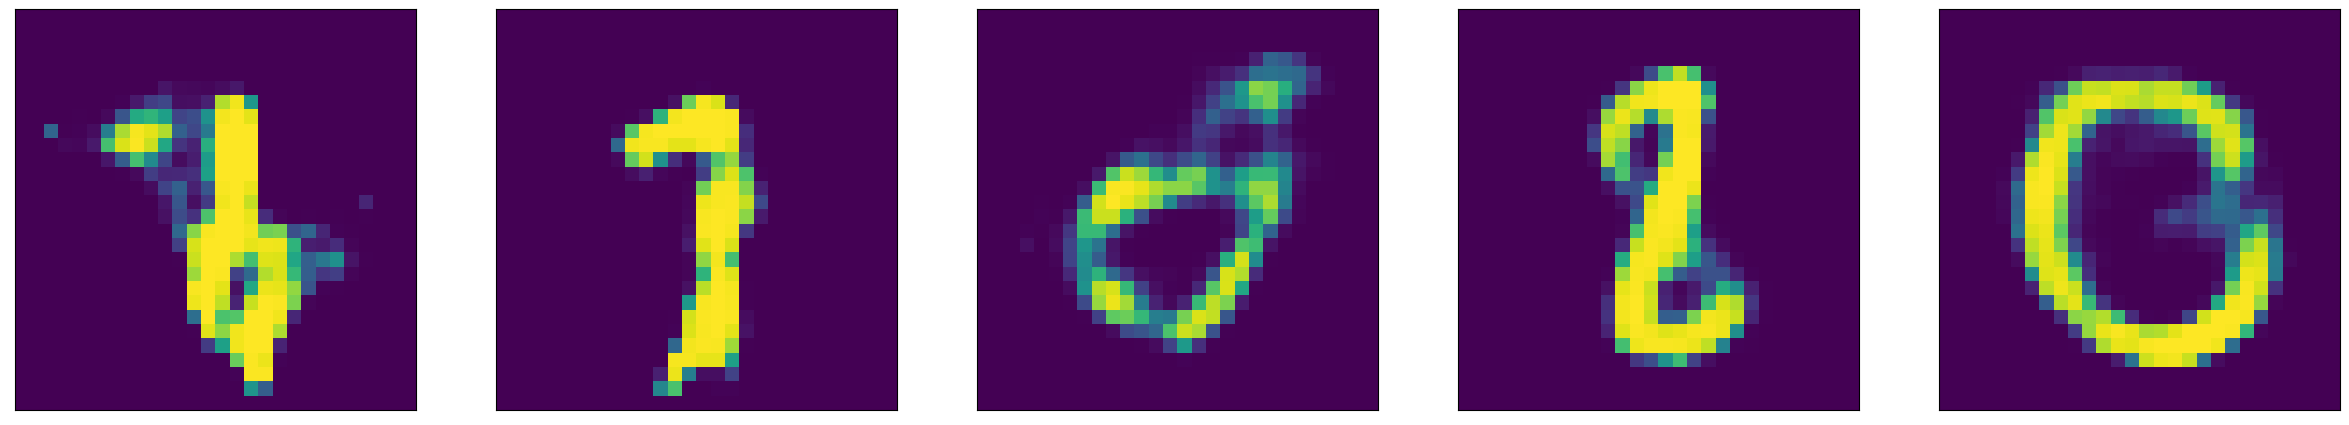

In [50]:
images = generate_data(model, 5)
fig, axes = plt.subplots(1,5, figsize=(30,10))
for i in range(5):
    axes[i].imshow(images[i].view(28,28,1).detach().numpy())
    axes[i].set_xticks([])
    axes[i].set_yticks([])
plt.savefig("images_VAE_ADAM_higher_lr.png")

## DBN

In [53]:
from src.dbn import DBN
from src.data import lire_mnist

X_train, y_train, X_test, y_test = lire_mnist("data/mnist_train.csv", "data/mnist_test.csv")
model = DBN([784, 150, 150])

In [59]:
model.train(X_train,0.01,batch_size , 100)

Epoch 0, erreur quadratique moyenne de reconstruction : 0.014968
Epoch 1, erreur quadratique moyenne de reconstruction : 0.014959
Epoch 2, erreur quadratique moyenne de reconstruction : 0.014953
Epoch 3, erreur quadratique moyenne de reconstruction : 0.014948
Epoch 4, erreur quadratique moyenne de reconstruction : 0.014947
Epoch 5, erreur quadratique moyenne de reconstruction : 0.014946
Epoch 6, erreur quadratique moyenne de reconstruction : 0.014943
Epoch 7, erreur quadratique moyenne de reconstruction : 0.014935
Epoch 8, erreur quadratique moyenne de reconstruction : 0.014935
Epoch 9, erreur quadratique moyenne de reconstruction : 0.014934
Epoch 10, erreur quadratique moyenne de reconstruction : 0.014932
Epoch 11, erreur quadratique moyenne de reconstruction : 0.014932
Epoch 12, erreur quadratique moyenne de reconstruction : 0.014927
Epoch 13, erreur quadratique moyenne de reconstruction : 0.014921
Epoch 14, erreur quadratique moyenne de reconstruction : 0.014920
Epoch 15, erreur qua

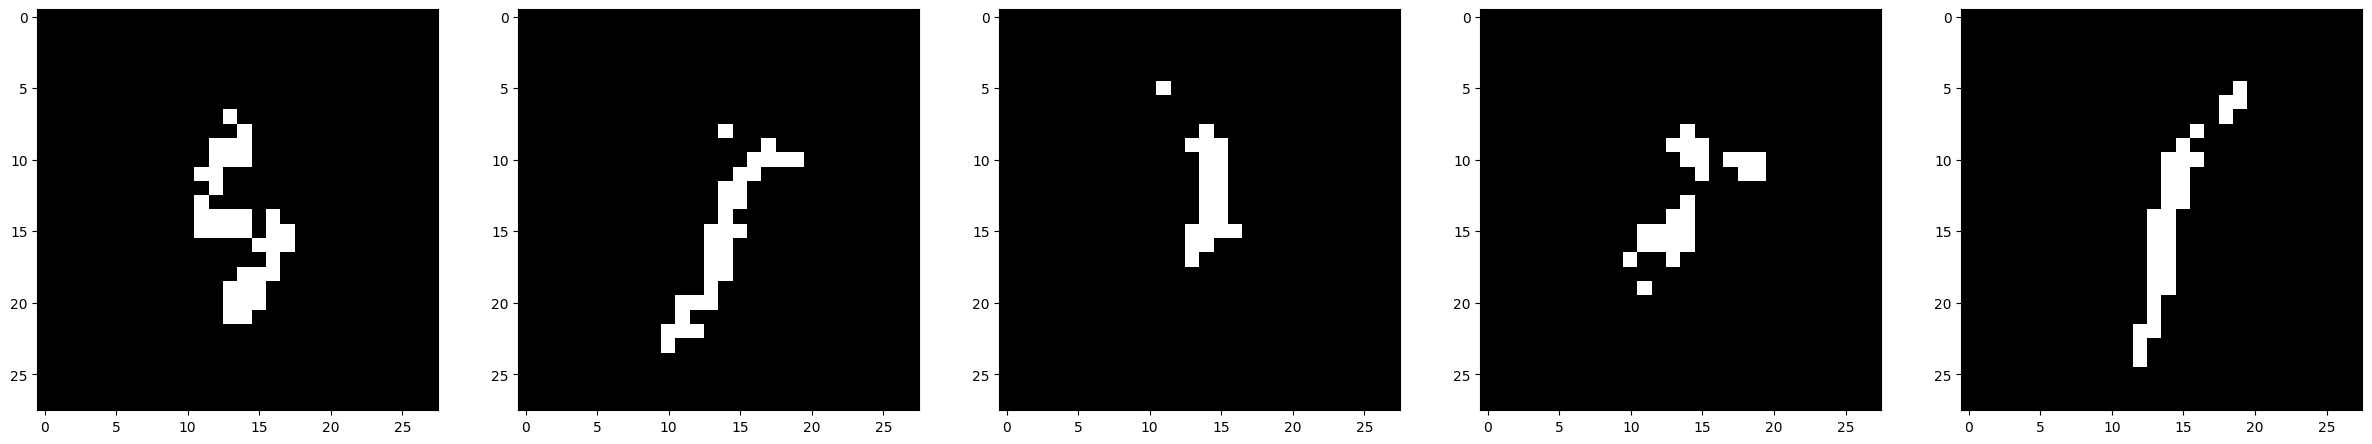

In [60]:
images_dbn = model.generer_image(30, 10)
fig, axes = plt.subplots(1,5, figsize=(30,10))
for i in range(5):
    axes[i].imshow(images_dbn[i].reshape(28,28,1), cmap='gray')
plt.savefig("dbn_mnist_images_high_lr.png")

## RBM

In [11]:
from src.rbm import RBM
from src.data import lire_alpha_digits
from src.utils import display_alpha_digits

In [12]:
rbm_mnist = RBM(784,200)

In [13]:

rbm_mnist.train(X_train,learning_rate, batch_size, n_epochs)

Epoch 0, erreur quadratique moyenne de reconstruction : 0.087530
Epoch 1, erreur quadratique moyenne de reconstruction : 0.082048
Epoch 2, erreur quadratique moyenne de reconstruction : 0.074179
Epoch 3, erreur quadratique moyenne de reconstruction : 0.067840
Epoch 4, erreur quadratique moyenne de reconstruction : 0.063535
Epoch 5, erreur quadratique moyenne de reconstruction : 0.060558
Epoch 6, erreur quadratique moyenne de reconstruction : 0.058210
Epoch 7, erreur quadratique moyenne de reconstruction : 0.056376
Epoch 8, erreur quadratique moyenne de reconstruction : 0.054810
Epoch 9, erreur quadratique moyenne de reconstruction : 0.053351
Epoch 10, erreur quadratique moyenne de reconstruction : 0.052006
Epoch 11, erreur quadratique moyenne de reconstruction : 0.050795
Epoch 12, erreur quadratique moyenne de reconstruction : 0.049725
Epoch 13, erreur quadratique moyenne de reconstruction : 0.048737
Epoch 14, erreur quadratique moyenne de reconstruction : 0.047814
Epoch 15, erreur qua

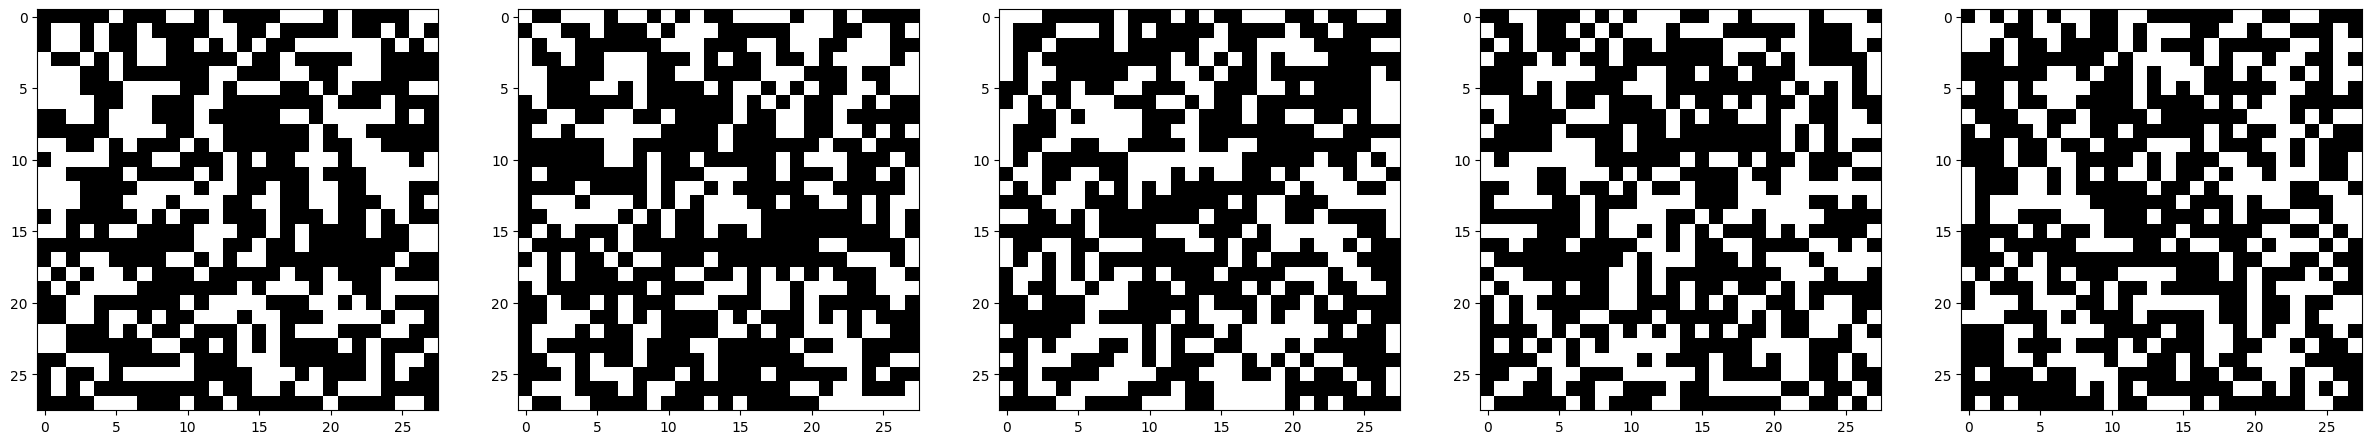

In [14]:
images_rbm = rbm_mnist.generer_image(10, 5)
fig, axes = plt.subplots(1,5, figsize=(30,10))
for i in range(5):
    axes[i].imshow(images_rbm[i].reshape(28,28,1),cmap="gray")
plt.savefig("images_rbm_mnist.png")

In [56]:
dbn_mnist = DBN([784,150, 150])
dbn_mnist.train(X_train, learning_rate, batch_size, n_epochs)

Epoch 0, erreur quadratique moyenne de reconstruction : 0.084122
Epoch 1, erreur quadratique moyenne de reconstruction : 0.069620
Epoch 2, erreur quadratique moyenne de reconstruction : 0.062581
Epoch 3, erreur quadratique moyenne de reconstruction : 0.058296
Epoch 4, erreur quadratique moyenne de reconstruction : 0.055450
Epoch 5, erreur quadratique moyenne de reconstruction : 0.053049
Epoch 6, erreur quadratique moyenne de reconstruction : 0.050925
Epoch 7, erreur quadratique moyenne de reconstruction : 0.049161
Epoch 8, erreur quadratique moyenne de reconstruction : 0.047611
Epoch 9, erreur quadratique moyenne de reconstruction : 0.046238
Epoch 10, erreur quadratique moyenne de reconstruction : 0.045002
Epoch 11, erreur quadratique moyenne de reconstruction : 0.043866
Epoch 12, erreur quadratique moyenne de reconstruction : 0.042852
Epoch 13, erreur quadratique moyenne de reconstruction : 0.041922
Epoch 14, erreur quadratique moyenne de reconstruction : 0.041055
Epoch 15, erreur qua

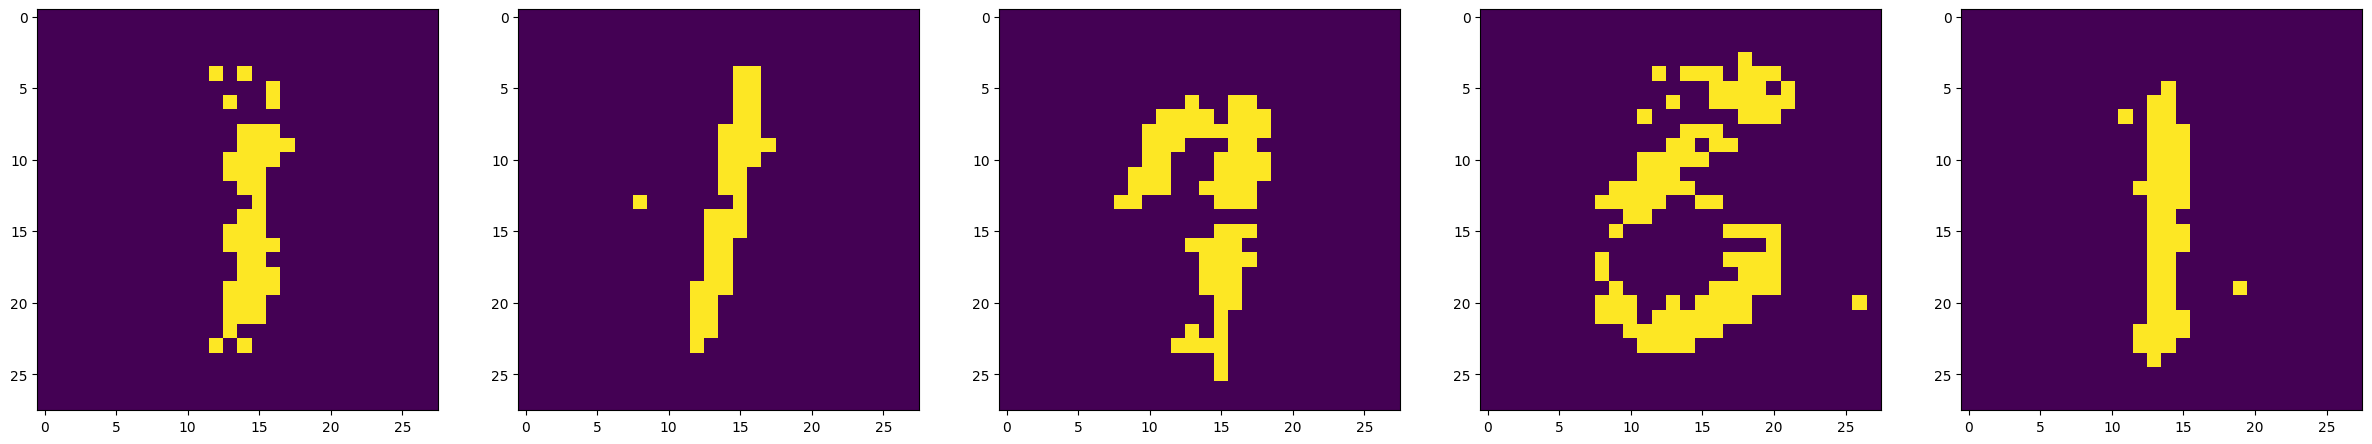

In [63]:
images_dbn = dbn_mnist.generer_image(30, 10)


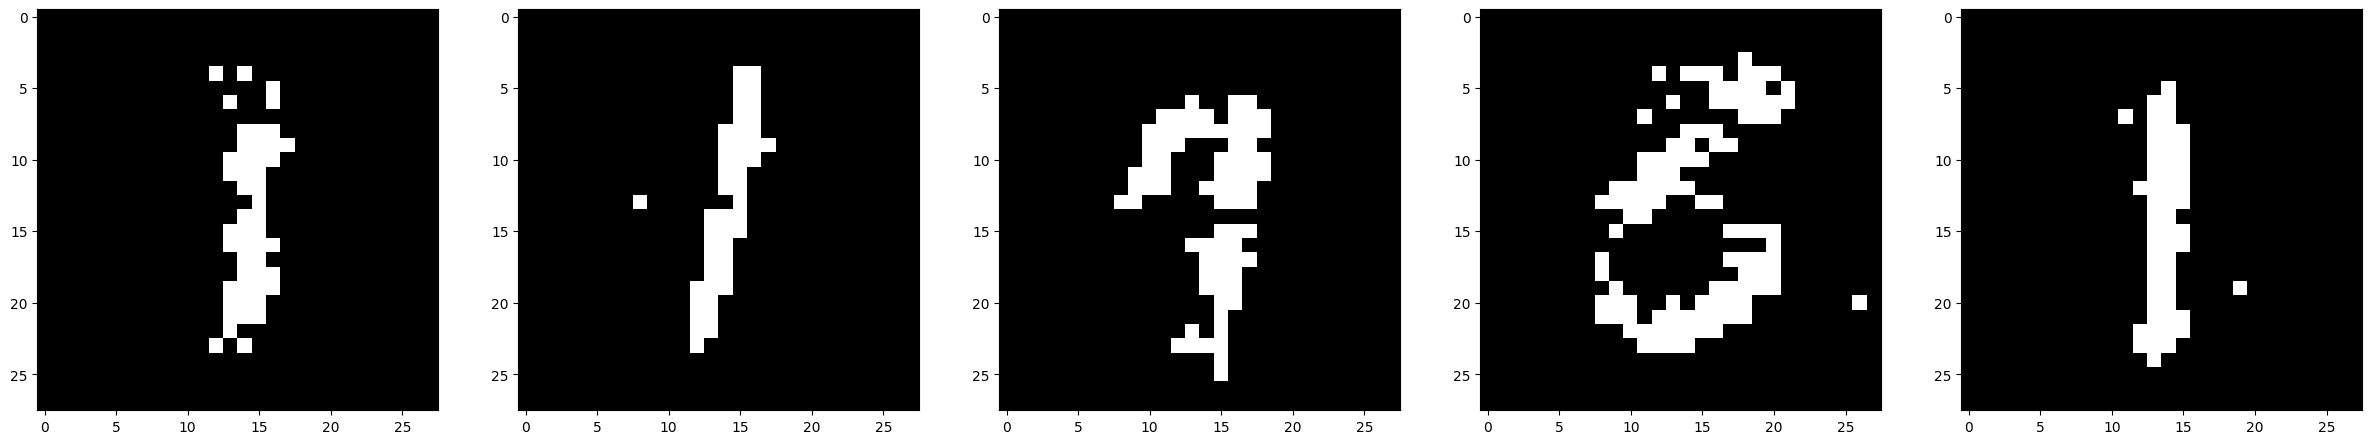

In [69]:
fig, axes = plt.subplots(1,5, figsize=(30,10))
for i in range(5):
    axes[i].imshow(images_dbn[i].reshape(28,28,1), cmap='gray')
plt.savefig("dbn_mnist_images.png")